In [1]:
import pandas as pd

# Criar Dataframes com base nos Datasets

In [15]:
# Carregar Dataframe clientes (Customers)
df_customers = pd.read_csv('./datasets/churn_customers.csv')

df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
# Carregar Dataframe clientes (Customers)
df_services = pd.read_csv('./datasets/churn_services.csv')

df_services.head(5)

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Carregar Dataframe clientes (Customers)
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

df_contracts.head(5)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Informações
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


# Transformação de Dados

In [10]:
# Transformar coluna TotalCharges de String para Float - Abordagem 1 com astype
df_contracts['TotalCharges'] = df_contracts['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [11]:
# Transformar coluna TotalCharges de String para Float - Abordagem 1 com to_numeric
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'])


ValueError: Unable to parse string " " at position 488

In [13]:
# Transformar coluna TotalCharges de String para Float - Abordagem 3 com to_numeric com coerce
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'], errors='coerce')
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


Após  a transformação da coluna TotalCharges do Dataframe Contracts, a coluna passou a ter 11 valores ausentes (missing values)

## Renomear colunas

In [16]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
# Renomear coluna no dataframe, usando rename e dicionario
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [19]:
# Rename usando lista - modificar todos os nomes de colunas
df_customers.columns = ["IDCliente", "Genero", "Mais65anos", "Tem parceiro", "Tem Dependentes"]
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IDCliente        7043 non-null   object
 1   Genero           7043 non-null   object
 2   Mais65anos       7043 non-null   int64 
 3   Tem parceiro     7043 non-null   object
 4   Tem Dependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


# Unificar Dataframes de Custumers, Services e Contracts

In [21]:
# Contar quantidade de registros por dataframe
print([len(df_customers),len(df_contracts),len(df_services)])

[7043, 7043, 7043]


In [23]:
# Unificar dataframes, usando colunas de junção com nomes iguais
df_churn_temp = df_services.merge(df_contracts, on=['customerID'])

In [24]:
# Unificar dataframes, usando colunas de junção com nomes diferentes
df_churn_temp = df_churn_temp.merge(df_customers, left_on=['customerID'], right_on=['IDCliente'])
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   PhoneService      7043 non-null   object 
 2   MultipleLines     7043 non-null   object 
 3   InternetService   7043 non-null   object 
 4   OnlineSecurity    7043 non-null   object 
 5   OnlineBackup      7043 non-null   object 
 6   DeviceProtection  7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   StreamingTV       7043 non-null   object 
 9   StreamingMovies   7043 non-null   object 
 10  tenure            7043 non-null   int64  
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   object 


In [30]:
# Unificar os 3 dataframes em uma só questão
df_churn = df_customers.merge(df_services, left_on=['IDCliente'], right_on=['customerID']).merge(df_contracts, on=['customerID'])
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   Tem parceiro      7043 non-null   object 
 4   Tem Dependentes   7043 non-null   object 
 5   customerID        7043 non-null   object 
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [31]:
# removendo coluna de um Dataframe
df_churn.drop(columns=['customerID'], axis=1, inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   Tem parceiro      7043 non-null   object 
 4   Tem Dependentes   7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Detecção de valores ausentes

In [32]:
# Detectar valores ausentes em todas as colunas de um DataFrame
df_churn.isna().sum()

IDCliente            0
Genero               0
Mais65anos           0
Tem parceiro         0
Tem Dependentes      0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
# Quantas linhas tem pelo menos 1 coluna com valor ausente
df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [34]:
# Quantas colunas tem pelo menos 1 valor ausente
df_churn.isna().any(axis=0).sum()

1

# Removendo valores ausentes

In [35]:
# Remover de forma direta e especifica a coluna que possui valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [36]:
# Remover colunas com valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [38]:
# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=1, how='all')

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Imputação de Valores Ausentes

In [39]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [41]:
# Preecher valores padrão conforme coluna
df_churn.fillna(value={'TotalCharges': 0, "Genero": "Não declarado"})

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [42]:
# Preencher todos os valores ausentes com a média da coluna
media_total_charges = df_churn['TotalCharges'].mean()
df_churn.fillna(value={'TotalCharges': media_total_charges})

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
# Preencher valores ausentes de TotalCharges como MonthlyCharges * tenure
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['MonthlyCharges'] * df_churn['tenure'])

# Análise Univariada

## Formulação de Hipóteses
01. A faixa etária do cliente tem uma forte associação com o churn
02. Um cliente que com menos de 6 meses de contrato ativo é mais propenso ao Churn
03. Cliente com contratos mensais são mais propensos ao Churn

In [44]:
# Contar clientes usando a variável churn como referência
df_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [45]:
# Contar clientes usando a variável churn como referência e normalizar
df_churn['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

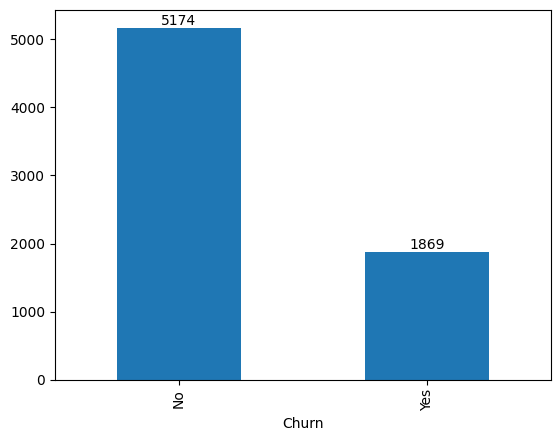

In [47]:
# Plotar distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

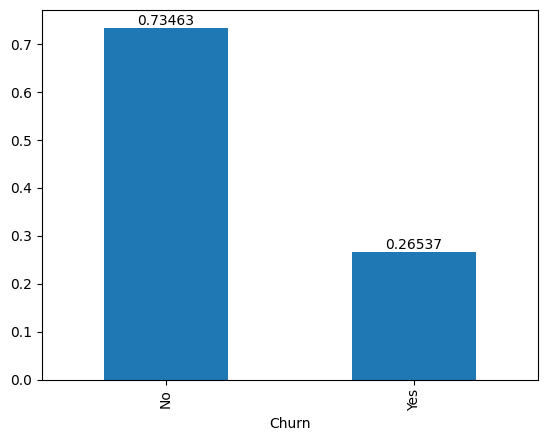

In [48]:
# Plotar distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

In [49]:
# Quais os tipos de contratos?
df_churn['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

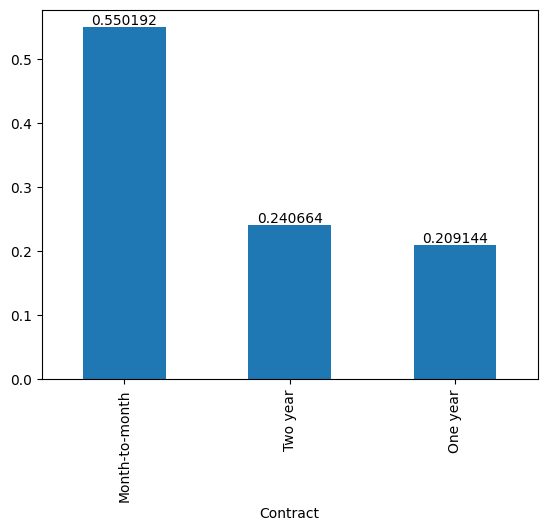

In [52]:
# Plotar distribuição Contract (Quantidade)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

<Axes: ylabel='Frequency'>

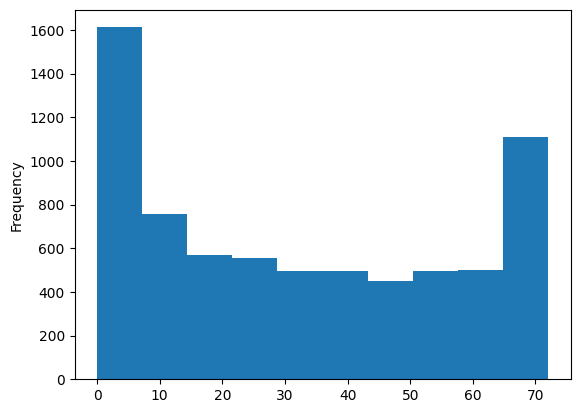

In [53]:
# Histograma do tempo de contrato
df_churn['tenure'].plot.hist()

<Axes: ylabel='Frequency'>

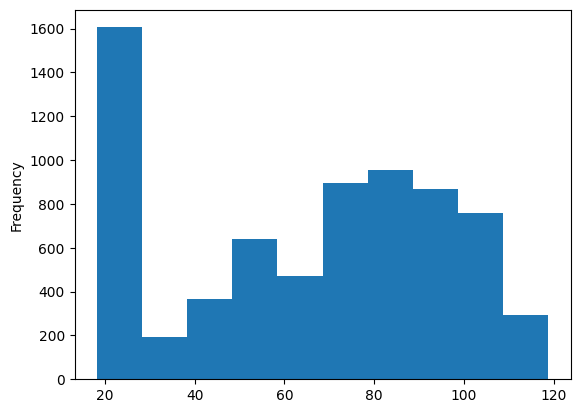

In [54]:
# Histograma do tempo de valor de cobrança mensal
df_churn['MonthlyCharges'].plot.hist()

In [55]:
# Medida de dispersão - desvio padrão tempo de contrato
df_churn['tenure'].std()

24.55948102309446

In [56]:
# Medida de dispersão - coeficiente de variação da cobrança mensal
df_churn.tenure.std() / df_churn.tenure.mean() * 100

75.86842617906674

In [58]:
# Quantos clientes possuem 1 mes de contrato - Filtro
len(df_churn[(df_churn.tenure == 1)])

613

In [59]:
# Quantos clientes possuem 1 mes de contrato percentualmente
len(df_churn[(df_churn.tenure == 1)]) / len(df_churn) * 100

8.70367741019452

In [61]:
# Quantos clientes possuem 1 mes de contrato - Filtro
len(df_churn[(df_churn.tenure>=1) & (df_churn.tenure<= 6)])

1470

In [64]:
# Quantos clientes por tempo de contrato - Agrupamento com sumarização
df_churn.groupby(['tenure']).size().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Length: 73, dtype: int64

<Axes: ylabel='tenure'>

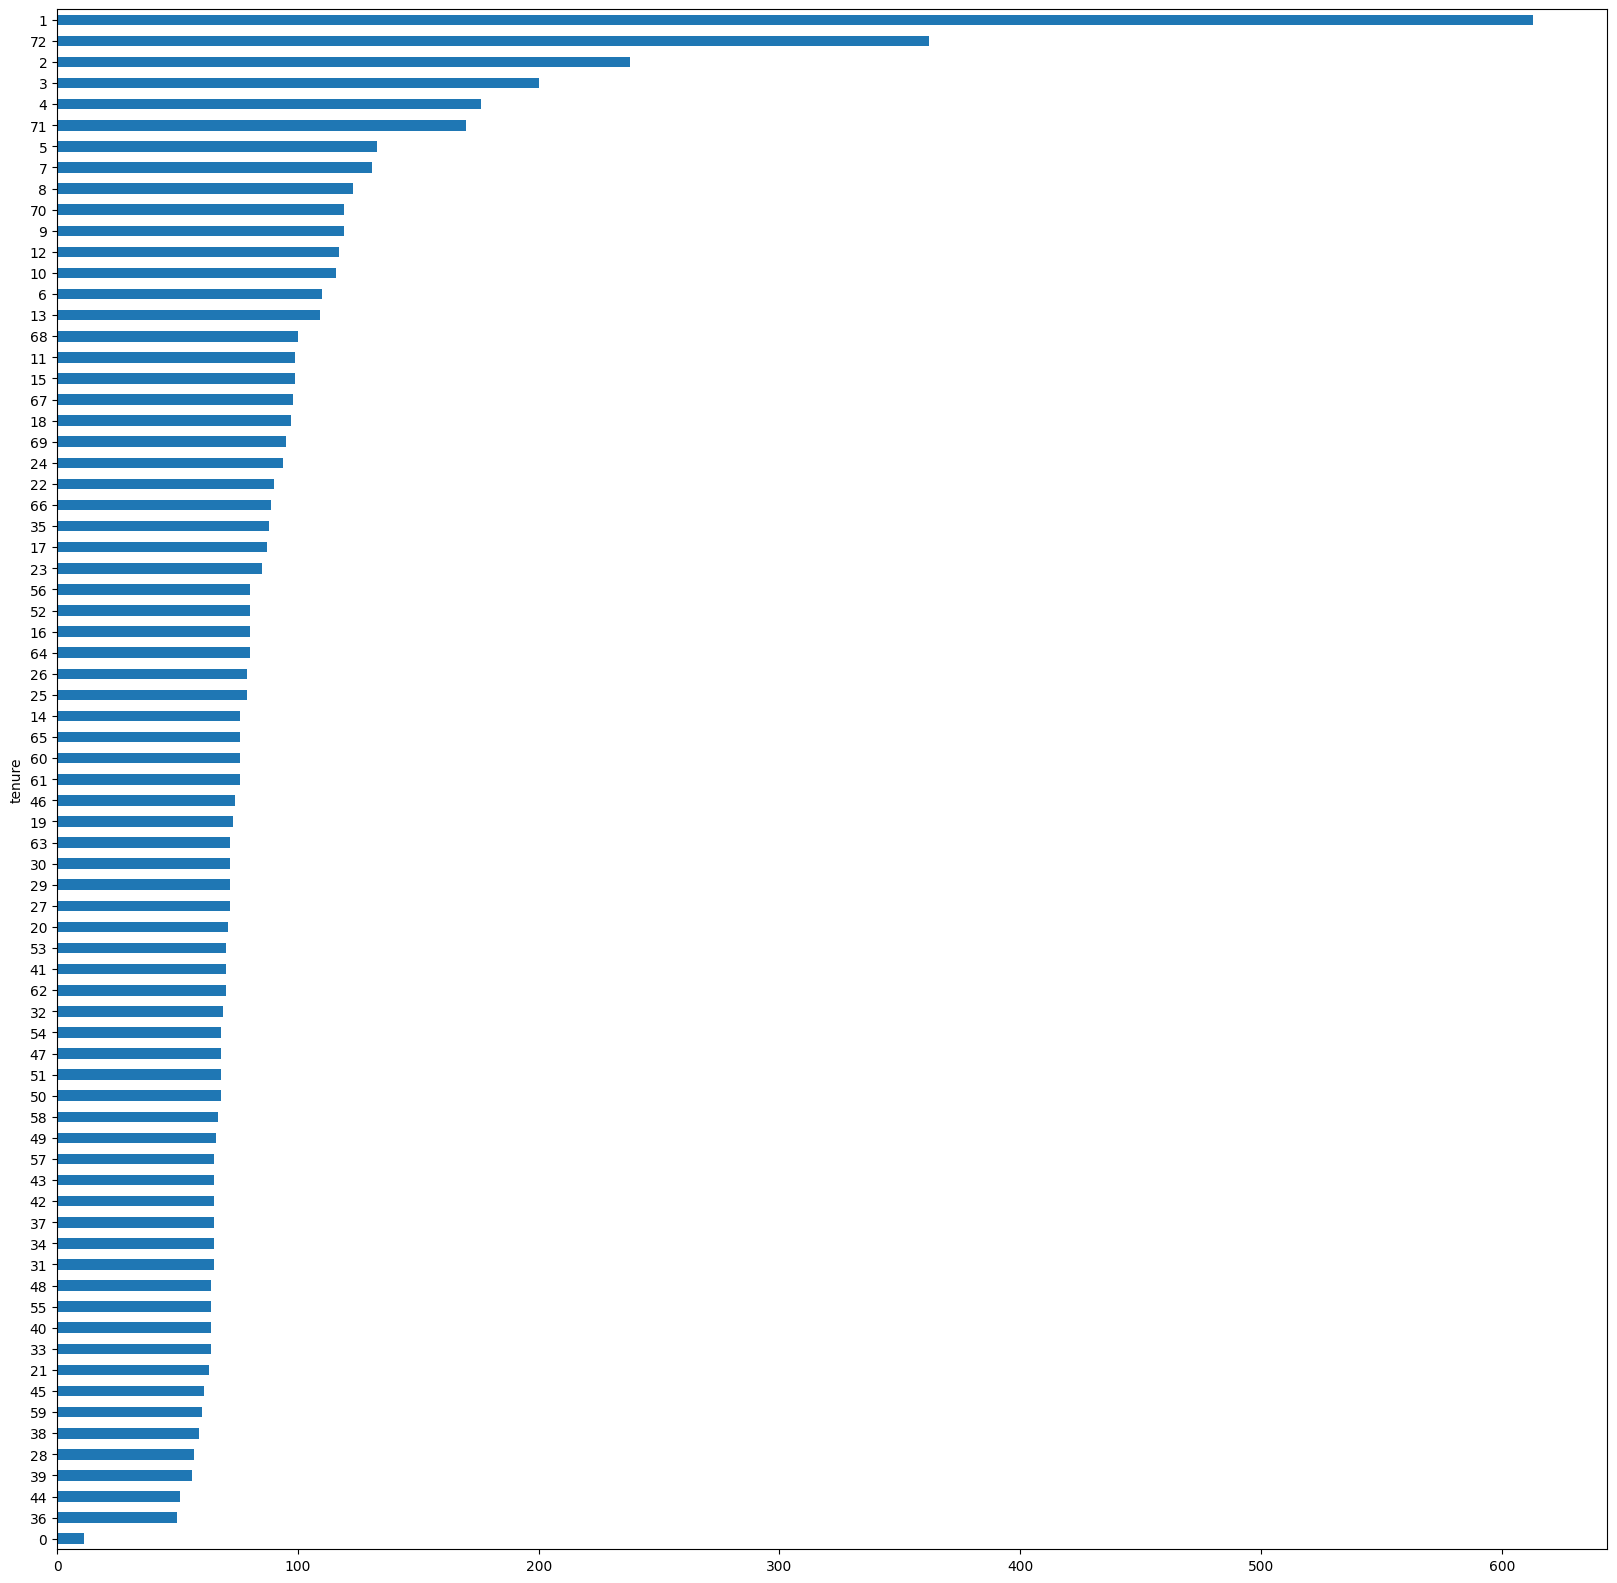

In [67]:
# Quantos clientes por tempo de contrato - Agrupamento com sumarização - Plot
df_churn.groupby(['tenure']).size().sort_values().plot.barh(figsize=(20,20))

# Análise Bivariada

In [70]:
# Hipótese: Clientes com contrato do tipo mensal são mais propensos a cancelar o serviço
# Contruir uma tabela de contingência entre o tipo de contrato e o churn
pd.crosstab(df_churn['Churn'],df_churn['Contract'], margins=True, margins_name="Total")

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [73]:
# Contruir uma tabela de contingência entre o tipo de contrato e o churn (Proporção)
pd.crosstab(df_churn['Churn'],df_churn['Contract'], margins=True, margins_name="Total", normalize="index")

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


Considerando o publico total, os clientes de contrato mensal  representam 55%. Porém, se considerarmos apenas os clientes que abandoraram o serviço, 88% tinham o contrato mensal. Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.

# Avaliar a correlação entre duas variáveis categóricas (qualitativas)

# Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
# Num teste de hipótese, duas hipóteses são formuladas:
# HO (Hipótese Nula): as duas variáveis são independentes
# H1 (Hipótese Complementar): as duas variáveis não são independentes

# O teste serve para confirmar ou recusar a hipótese nula (H0)
# Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value < 0.05), rejeitamos H0 e seguimos com a complementar


In [76]:
# Gerar um DF da crosstab (sem totais)
df_crosstab_churn_contract = pd.crosstab(df_churn['Churn'],df_churn['Contract'])

In [74]:
# Calcular os Score e P-values
from scipy.stats import chi2_contingency

In [77]:
# Tupla = lista imutável
chi_score_churn_contract = chi2_contingency(df_crosstab_churn_contract)
chi_score_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [80]:
scores_churn_contract = pd.Series(chi_score_churn_contract[0])
scores_churn_contract

0    1184.596572
dtype: float64

In [81]:
pvalues_churn_contract = pd.Series(chi_score_churn_contract[1])
pvalues_churn_contract

0    5.863038e-258
dtype: float64

In [82]:
# Apresentar numeros com decimais sem a notação cientifica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

In [84]:
# Criar um dataframe com os resultados
df_chi_scores_churn_contract = pd.DataFrame({"Qui2": scores_churn_contract, 'p-value': pvalues_churn_contract})
df_chi_scores_churn_contract

,Qui2,p-value
0,1184.596572083792580,0.000000000000000


Conforme Teste Estatístico (Chi-Square), o P-value <= 0.05, desta forma rejeitamos a hipótese nula, ou seja, as variáveis não são independentes. Pelo Qui2 alto, podemos afirmar que hã uma forte correlação.

# Avaliar a correlação entre uma variável qualitativa e quantitativa
# Usar o mesmo teste de Chi-Square, mas transformar a variável quantitativa em qualitativa
# Hipótese: Cliente com menos de 6 meses de contrato é mais propenso ao Churn
# Criar uma coluna nova no Dataframe com base numa condição
# Coluna = 'TempoMenorMeses' de outra Coluna

In [85]:
import numpy as np

In [86]:
# Criar coluna nova
df_churn["TempoMenor6Meses"] = np.where(df_churn.tenure < 6, "Sim", "Não")
df_churn

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Sim
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,Não
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Sim
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,Não
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No,Não
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No,Não
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,Não
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes,Sim


In [87]:
# Gerar um DF da crosstab (sem totais)
df_crosstab_churn_tenure = pd.crosstab(df_churn['Churn'],df_churn['TempoMenor6Meses'])

In [88]:
# Calcular os score
chi_score_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

In [89]:
scores_churn_tenure = pd.Series(chi_score_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_score_churn_tenure[1])
# Criar um dataframe com os resultados
df_chi_scores_churn_tenure = pd.DataFrame({"Qui2": scores_churn_tenure, 'p-value': pvalues_churn_tenure})
df_chi_scores_churn_tenure

,Qui2,p-value
0,669.721615828710242,0.000000000000000


Como o P-Value <= 0.05, rejeitamos a HO, ou seja, as variáveis não são independentes. E vale mencionar que com base do Qui2 resultante das 2 análises, a correlação entre Churn e Tempo de Contrato < 6 meses é menor do que a correlação entre Churn e Tipo de Contrato.

In [90]:
# Correlação entre 2 variáveis numéricas
# Tenure com TotalCharges
# A intuição é que quanto mais tempo de contrato maior o valor pago
# Correlação entre 2 variáveis numéricas - Pearson
df_churn.tenure.corr(df_churn.TotalCharges)


0.826178397950242

In [91]:
# Correlação entre 2 variáveis numéricas - Spearman
df_churn.tenure.corr(df_churn.TotalCharges, method='spearman')

0.8896957900597577

Há uma forte correlação entre Tenure e TotalCharges, usando métodos estatísticos de correlação.

<Axes: xlabel='tenure', ylabel='TotalCharges'>

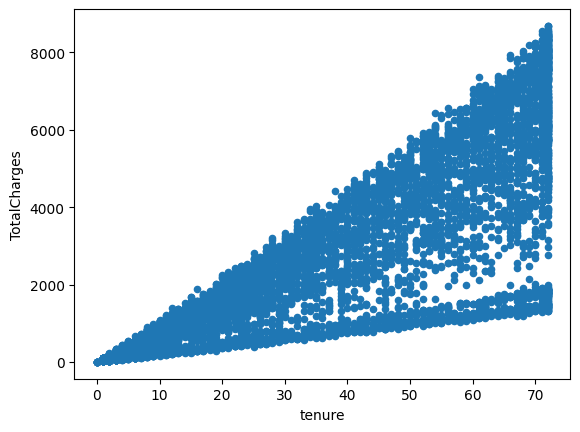

In [93]:
# Apresentar Plot Scatter entre Tenure e TotalCharges
# Gráfico de Dispersão
df_churn.plot.scatter(x='tenure', y='TotalCharges')

- Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte
associação com o Churn.
- Desafio 2: Validar com Teste de Hipótese se Contrato Mensal está mais propenso ao
Churn.

# Detecção de Outliers (Valores Atípicos)

In [94]:
# Remover linhas com valores nulos
df_churn.dropna(axis=0, inplace=True)

<Axes: >

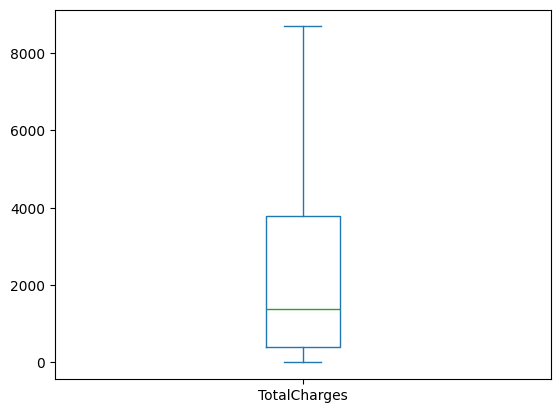

In [95]:
# Box Plot Geral
df_churn.TotalCharges.plot.box()

TotalCharges    Axes(0.125,0.11;0.775x0.77)
dtype: object

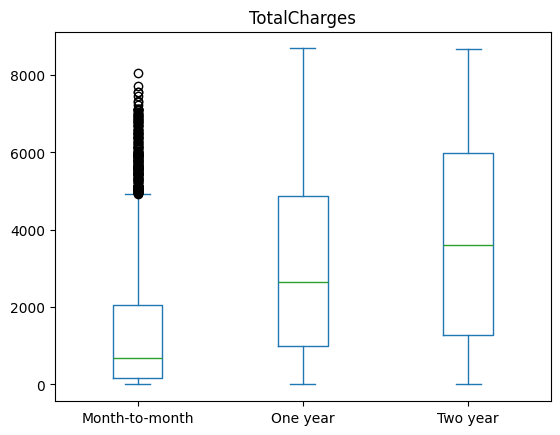

In [96]:
# Box Plot agrupado por Contract
df_churn.plot.box(column='TotalCharges', by='Contract')

In [97]:
#Criar um dataframe somente com os clientes do tipo Month to Month (Contrato mensal)
df_churn_monthly = df_churn[df_churn.Contract == 'Month-to-month']
df_churn_monthly

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Sim
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Sim
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Sim
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,Não
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,38,Month-to-month,Yes,Credit card (automatic),69.500000000000000,2625.250000000000000,No,Não
7034,0639-TSIQW,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,67,Month-to-month,Yes,Credit card (automatic),102.950000000000003,6886.250000000000000,Yes,Não
7035,8456-QDAVC,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Yes,No,19,Month-to-month,Yes,Bank transfer (automatic),78.700000000000003,1495.099999999999909,No,Não
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,Não


<Axes: ylabel='Frequency'>

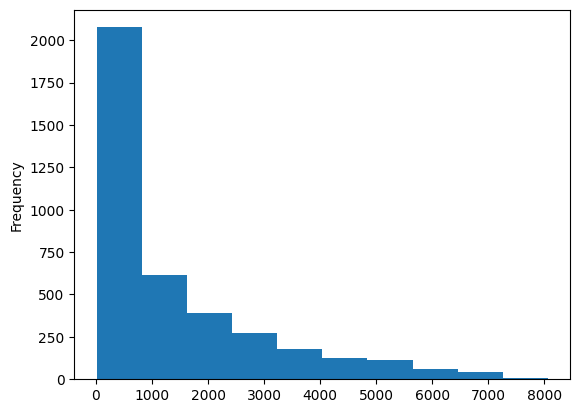

In [98]:
# Histograma - Checar visualmente se os dados seguem uma distribuição normal
df_churn_monthly.TotalCharges.plot.hist()

# Método de Tukey - IQR (Distruibuição não normal)

In [103]:
# IQR - Range interquartil
# IQR = 3o quartil - 1o quartil
q1_TotalCharges_month = df_churn_monthly.TotalCharges.quantile(0.25)
q3_TotalCharges_month = df_churn_monthly.TotalCharges.quantile(0.75)
iqr_TotalCharges_month = q3_TotalCharges_month - q1_TotalCharges_month
iqr_TotalCharges_month

1906.4

In [104]:
# Limite Inferior e Superior
limInf_TotalCharges_month = q1_TotalCharges_month - 1.5 * iqr_TotalCharges_month
limSup_TotalCharges_month = q3_TotalCharges_month + 1.5 * iqr_TotalCharges_month
limInf_TotalCharges_month, limSup_TotalCharges_month

(-2699.5000000000005, 4926.1)

In [105]:
df_churn_monthly[(df_churn_monthly.TotalCharges < limInf_TotalCharges_month) | (df_churn_monthly.TotalCharges > limSup_TotalCharges_month)]

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
13,0280-XJGEX,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,49,Month-to-month,Yes,Bank transfer (automatic),103.700000000000003,5036.300000000000182,Yes,Não
61,1215-FIGMP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,60,Month-to-month,Yes,Bank transfer (automatic),89.900000000000006,5450.699999999999818,No,Não
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,Não
110,0486-HECZI,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,55,Month-to-month,Yes,Electronic check,96.750000000000000,5238.899999999999636,Yes,Não
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2363-BJLSL,Male,0,No,No,Yes,No,DSL,No,Yes,...,Yes,Yes,62,Month-to-month,Yes,Bank transfer (automatic),80.400000000000006,4981.149999999999636,No,Não
6952,6394-MFYNG,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,48,Month-to-month,Yes,Bank transfer (automatic),107.400000000000006,5121.300000000000182,Yes,Não
6965,7789-CRUVC,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,61,Month-to-month,Yes,Credit card (automatic),94.200000000000003,5895.449999999999818,No,Não
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,Não


# ZScore (Usado para Distribuição normal)
Indica quantos desvios padrões um valor está acima ou abaixo da média
zscore = (x-media) / desvio_padrao

In [106]:
from scipy.stats import zscore

In [109]:
z = np.abs(zscore(df_churn_monthly.TotalCharges))
z

0      0.830035854105835
2      0.781512944511796
4      0.754555772515107
5      0.340066014124648
6      0.359519077072167
              ...       
7033   0.778346771186232
7034   3.418910216654943
7035   0.077987048610201
7040   0.633837218378213
7041   0.658532466747594
Name: TotalCharges, Length: 3875, dtype: float64

In [111]:
df_churn_monthly[z > 3]

,IDCliente,Genero,Mais65anos,Tem parceiro,Tem Dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,Não
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,Não
339,1343-EHPYB,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.400000000000006,6603.000000000000000,Yes,Não
402,0979-PHULV,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,69,Month-to-month,Yes,Credit card (automatic),99.450000000000003,7007.600000000000364,Yes,Não
445,7752-XUSCI,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,60,Month-to-month,Yes,Electronic check,105.900000000000006,6396.449999999999818,Yes,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,1548-FEHVL,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,61,Month-to-month,Yes,Electronic check,106.200000000000003,6375.199999999999818,No,Não
6587,7426-GSWPO,Male,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,64,Month-to-month,Yes,Bank transfer (automatic),103.500000000000000,6548.649999999999636,No,Não
6713,4989-LIXVT,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,68,Month-to-month,Yes,Electronic check,95.900000000000006,6503.199999999999818,No,Não
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,Não


# Automatização de EDA

In [112]:
import sweetviz as sv
sv_churn_report = sv.analyze(df_churn, target_feat='Churn')

/Users/abilioazevedo/.local/share/virtualenvs/statistic_dev-k82UT3Rq/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



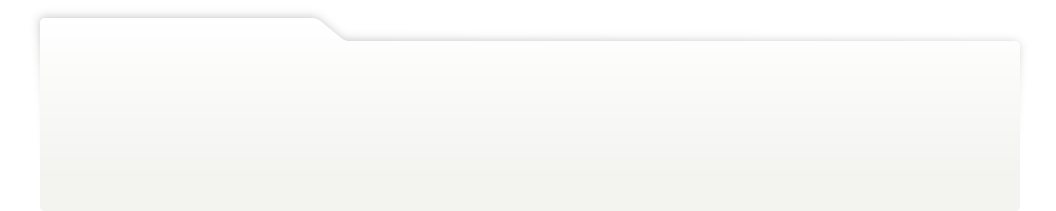
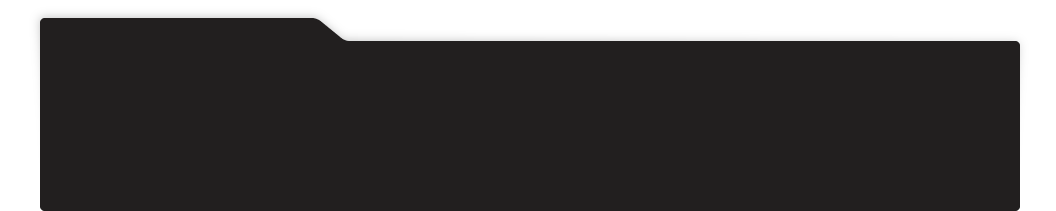
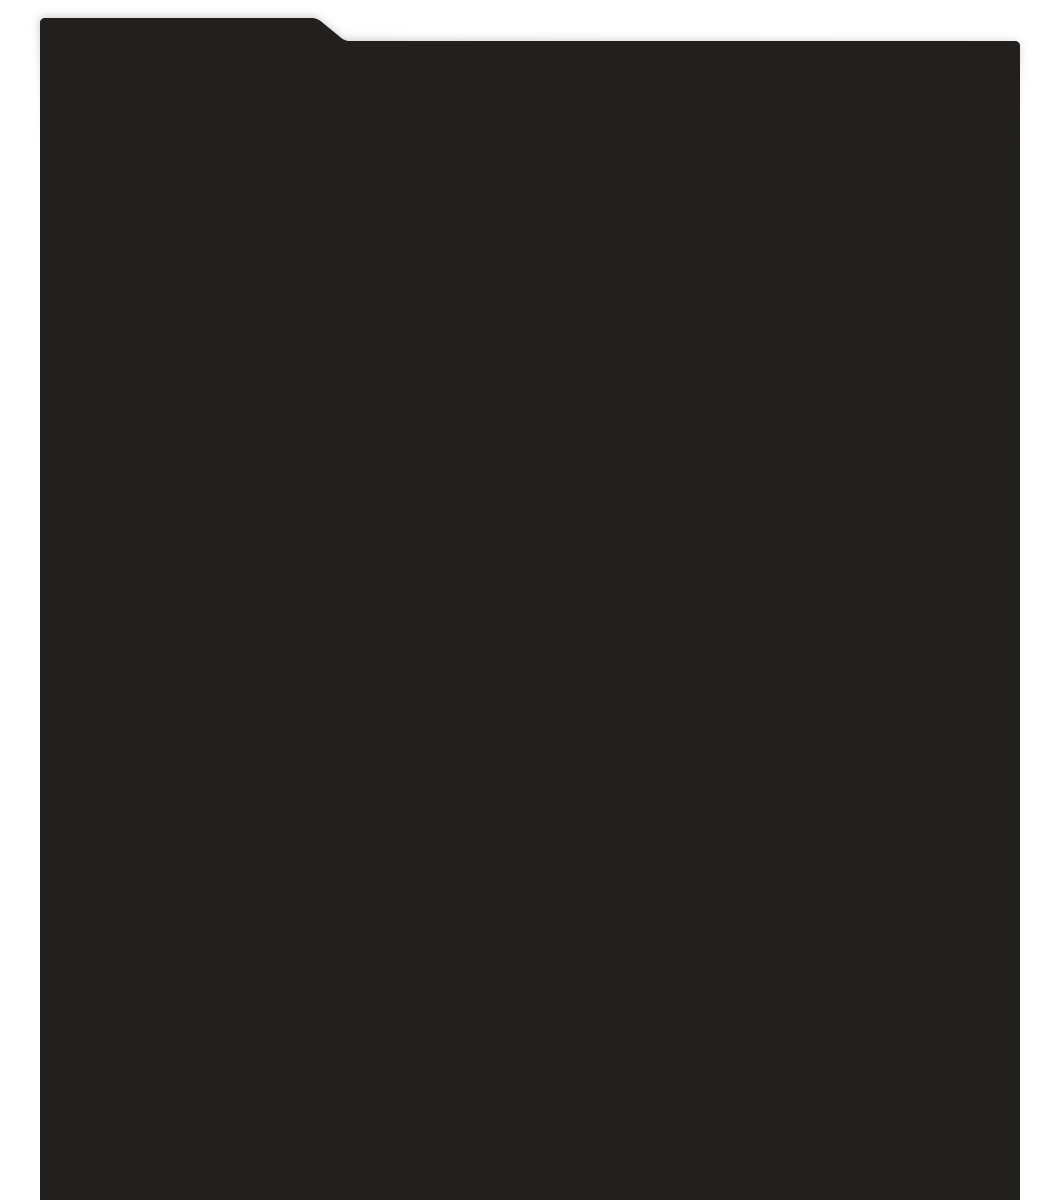
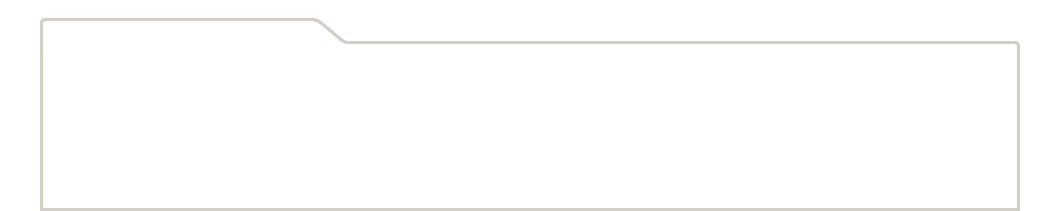
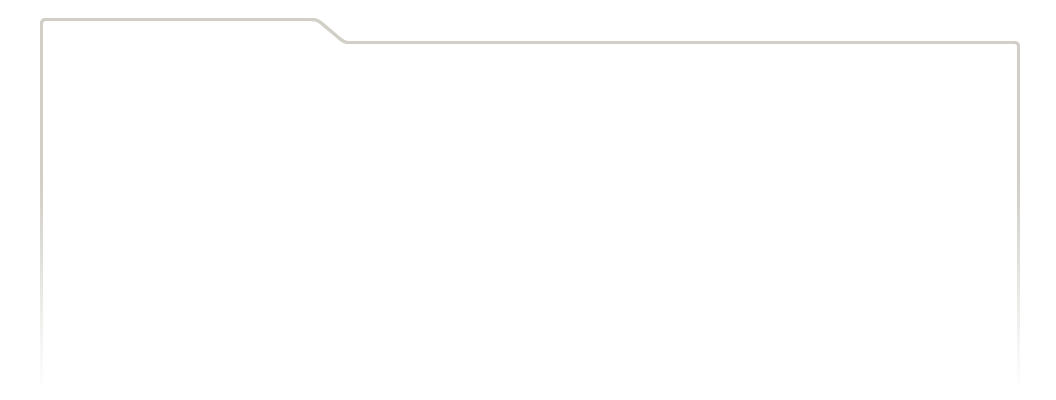
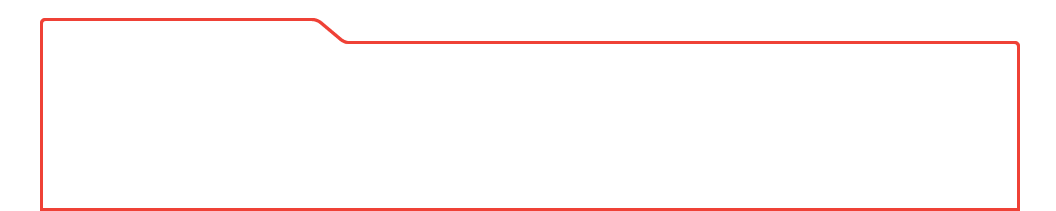
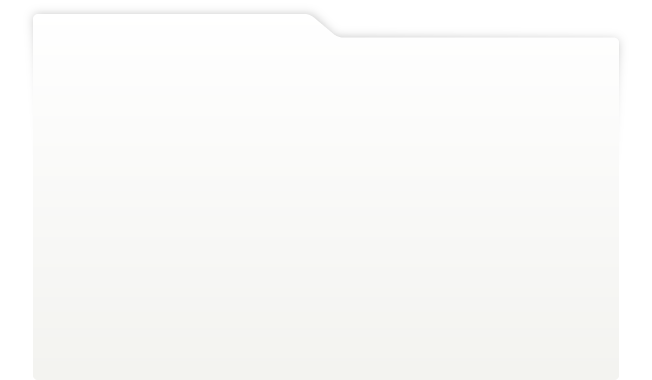
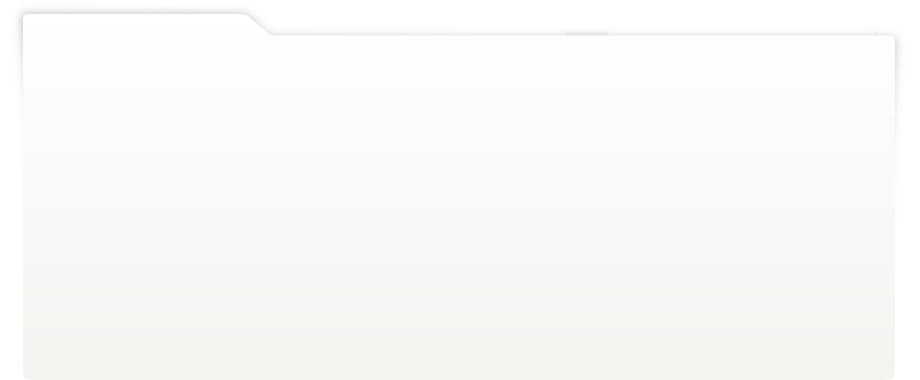
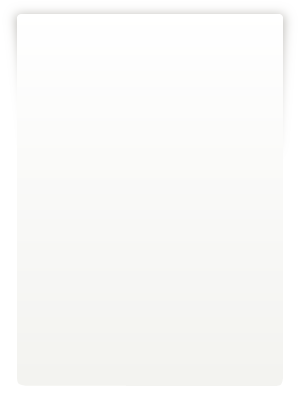
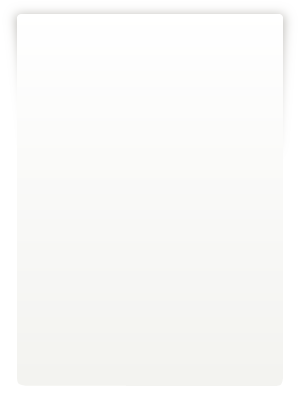
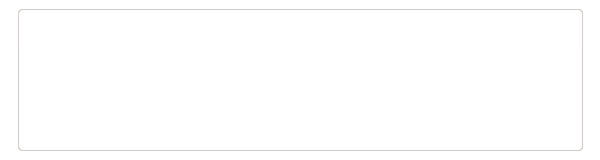
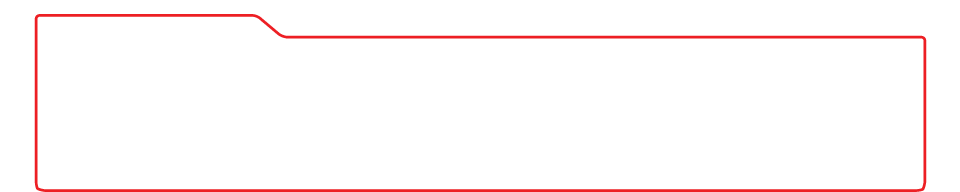
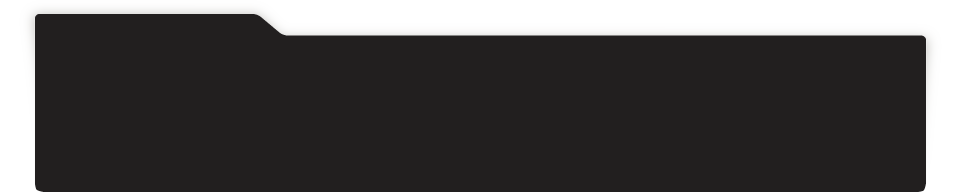
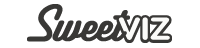
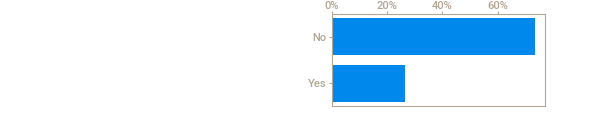
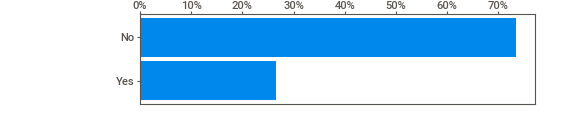
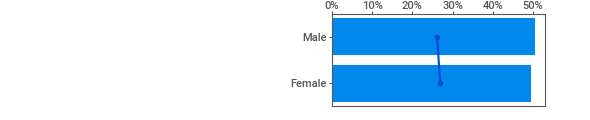
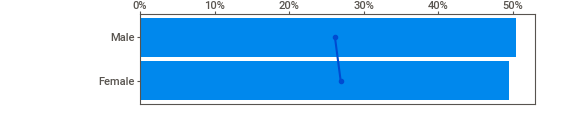
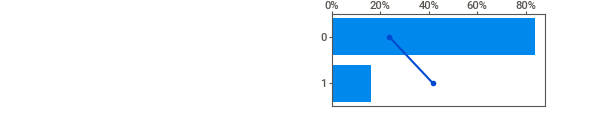
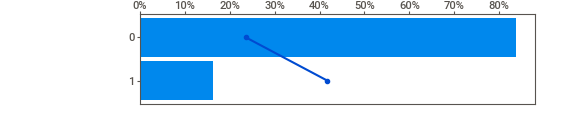
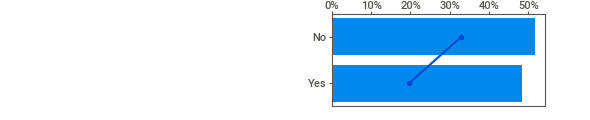
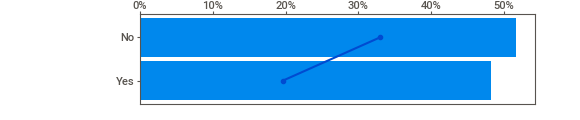
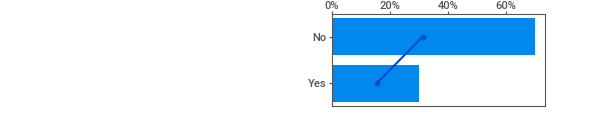
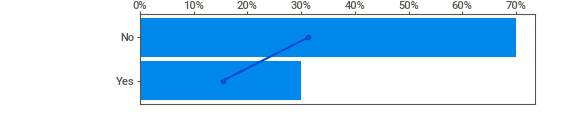
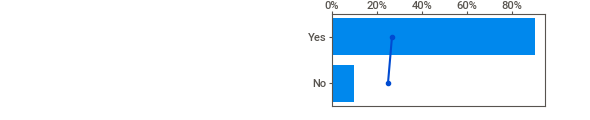
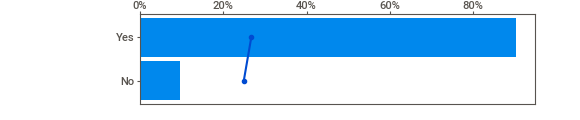
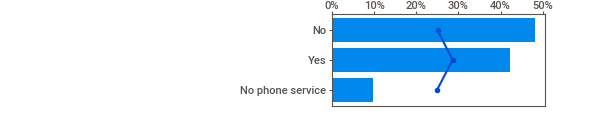
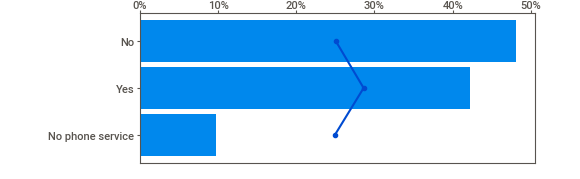
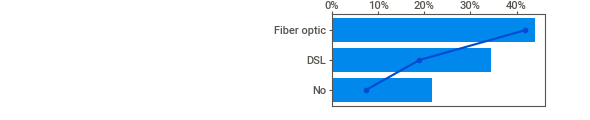
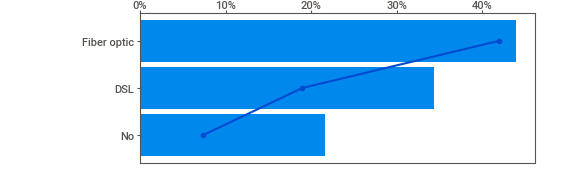
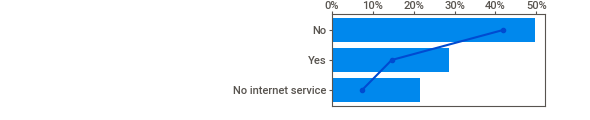
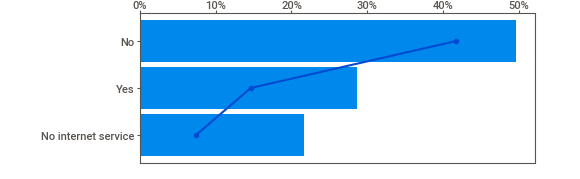
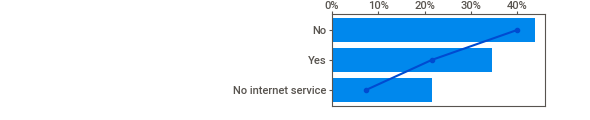
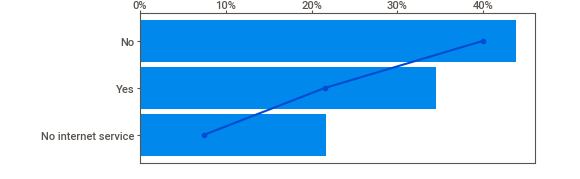
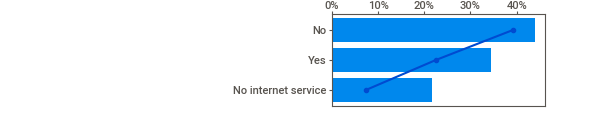
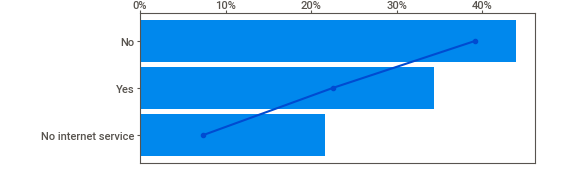
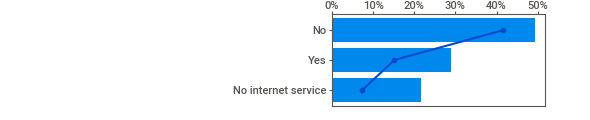
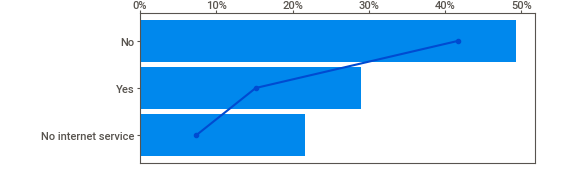
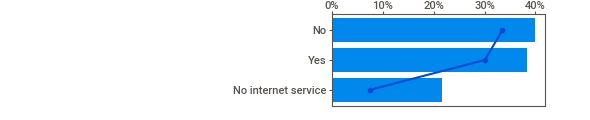
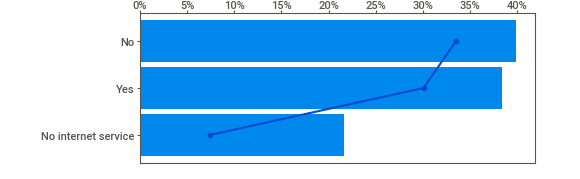
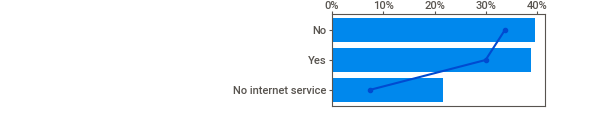
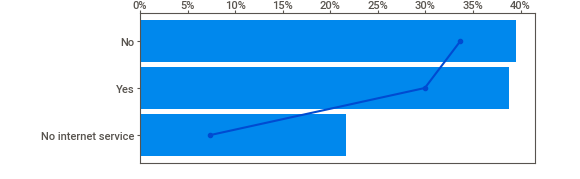
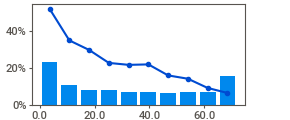
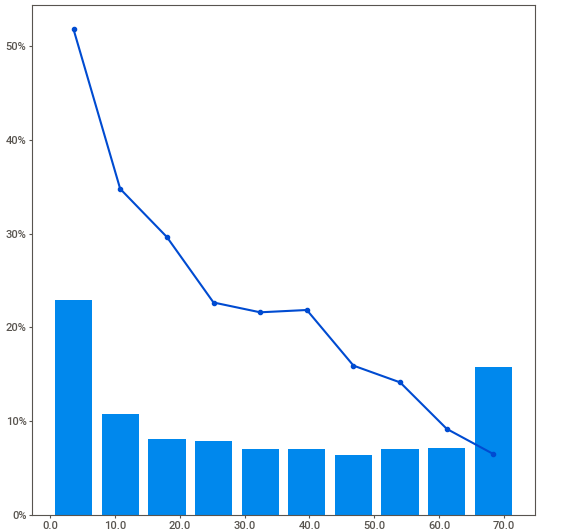
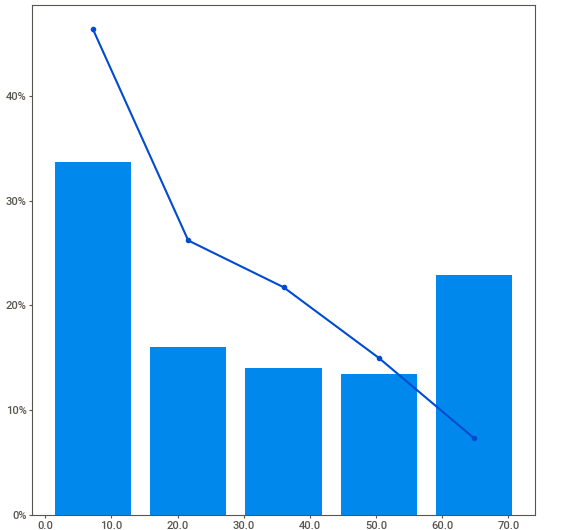
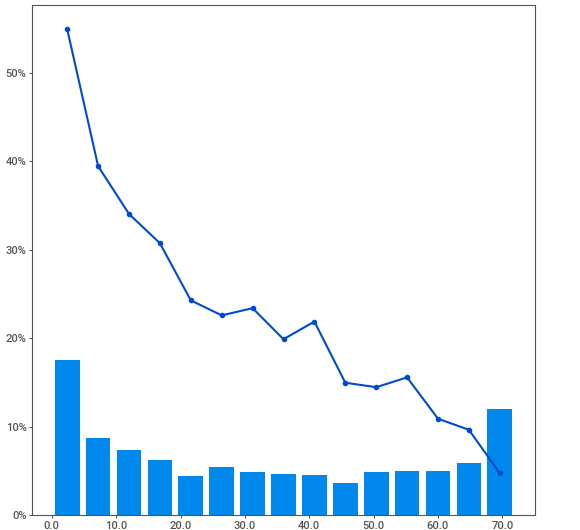
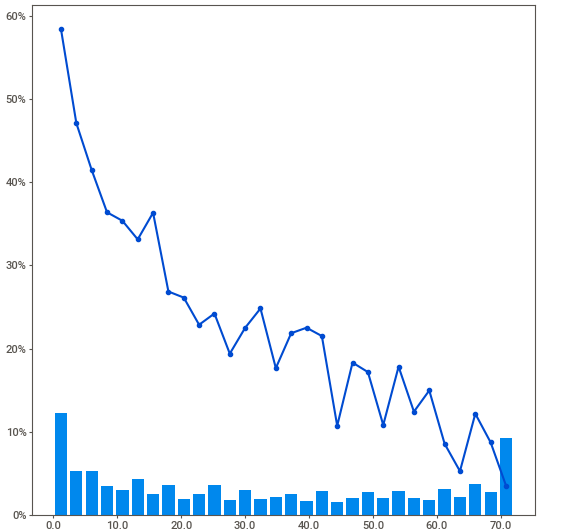
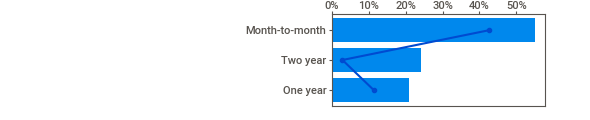
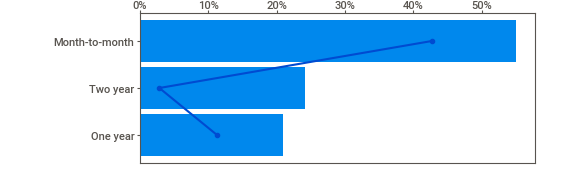
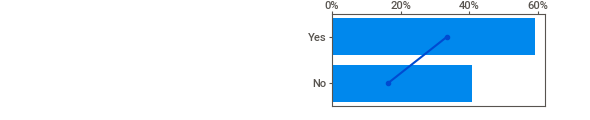
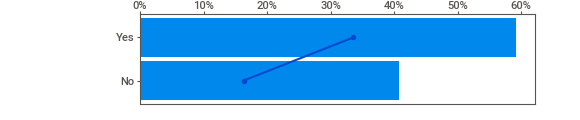
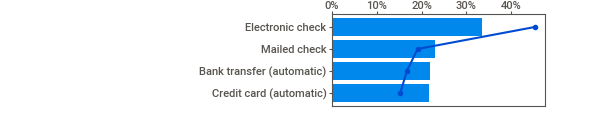
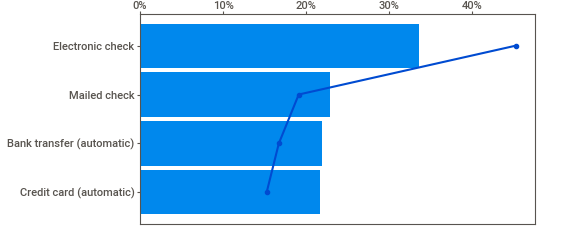
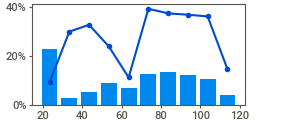
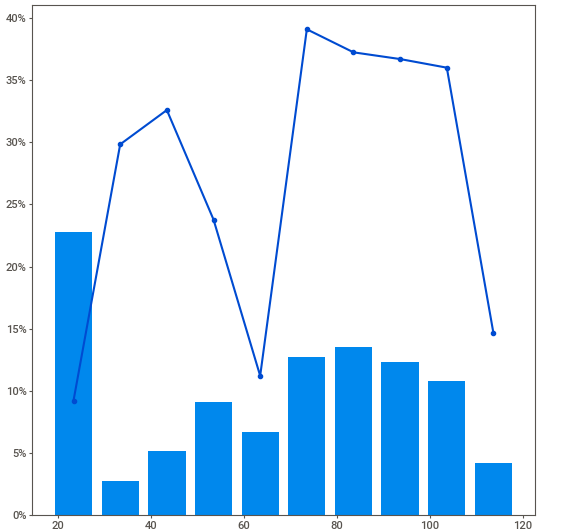
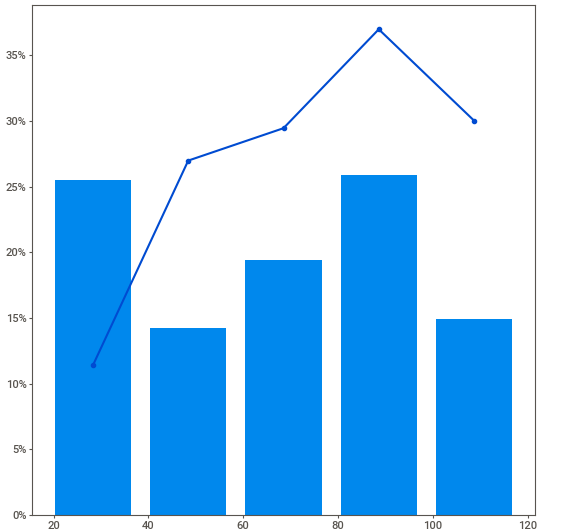
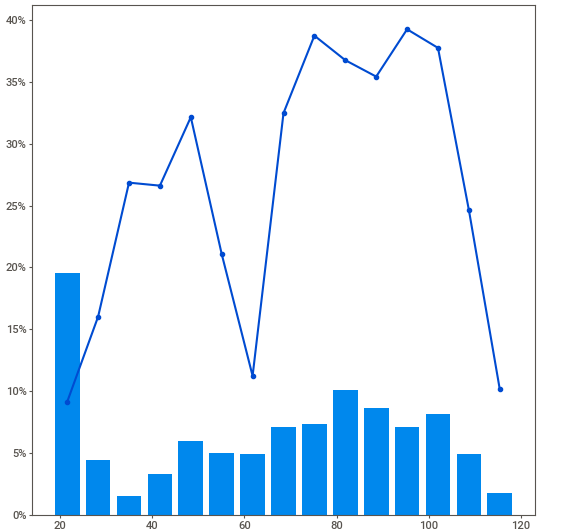
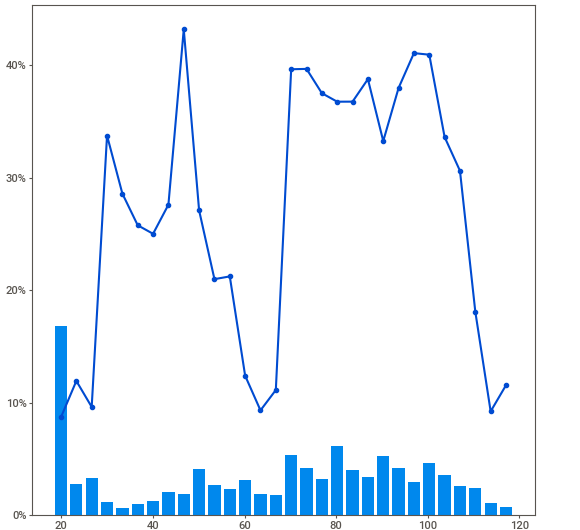
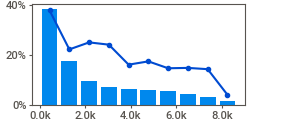
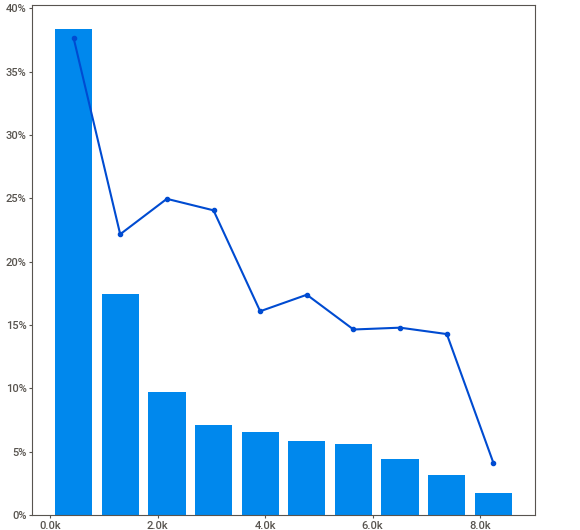
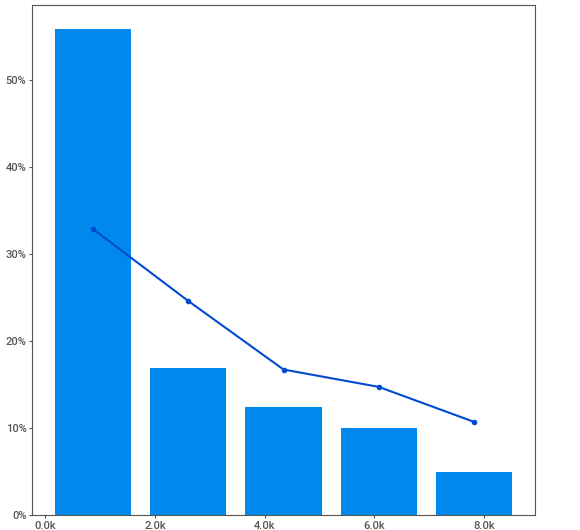
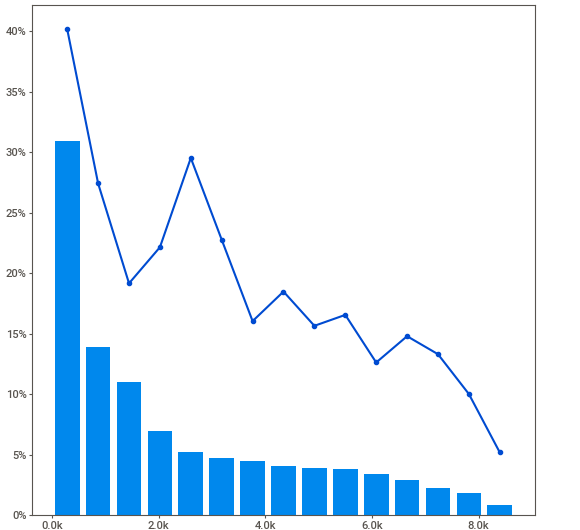
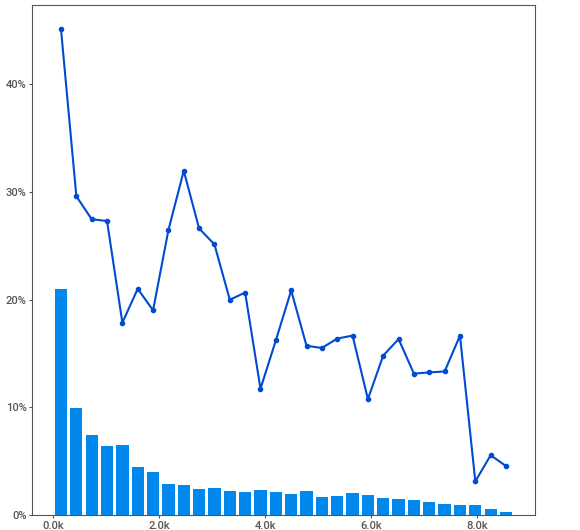
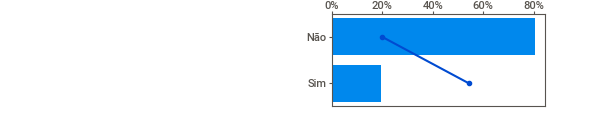
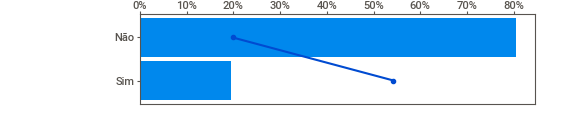
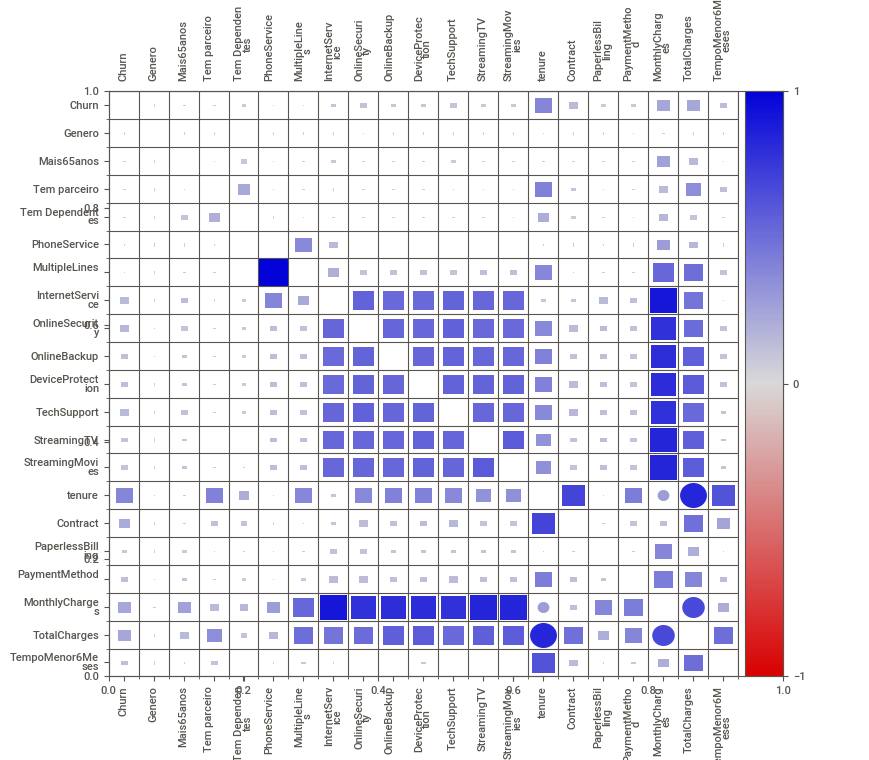
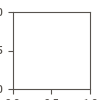

In [113]:
sv_churn_report.show_notebook()

In [114]:
sv_churn_report.show_html('churn_report.html', open_browser=True, layout='widescreen')

Report churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
